In [99]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [87]:
df = pd.read_csv('Dataset_analyse.csv')

# Vision Macro

In [88]:
df.columns

Index(['title', 'year', 'director', 'country', 'duration', 'genre',
       'first_day', 'first_week', 'first_weekend', 'hebdo_rank',
       'total_spectator', 'copies', 'rating_press', 'rating_public', 'casting',
       'budget', 'lang', 'visa', 'award'],
      dtype='object')

In [89]:
df

,title,year,director,country,duration,genre,first_day,first_week,first_weekend,hebdo_rank,total_spectator,copies,rating_press,rating_public,casting,budget,lang,visa,award
0,rien ne va plus,1997,claude chabrol,france,6300,thriller,238507.8,172230,124628.8,3,458125,234,3.24,3.0,"[""Michel Serrault"", ""Isabelle Huppert"", ""Franç...",131200000.0,"[""francais"", ""hongrois""]",90016,0
1,la fille sur le pont,1999,patrice leconte,france,5400,drame,34301.6,154881,238497.8,5,663390,198,3.40,3.6,"[""Vanessa Paradis"", ""Daniel Auteuil"", ""Claude ...",990000000.0,"[""francais""]",90876,1
2,grosse fatigue,1994,michel blanc,france,5220,comedie,189874.2,417021,933258.2,2,2015230,189,3.34,2.7,"[""Michel Blanc"", ""Philippe Noiret"", ""Marie-Ann...",129400000.0,"[""francais""]",82266,1
3,braveheart,1995,mel gibson,etatsunis,9900,aventure action,32990.8,355642,228501.8,3,1231534,302,2.60,4.2,"[""Mel Gibson"", ""Sophie Marceau"", ""Catherine Mc...",72000000.0,"[""anglais""]",88091,9
4,regarde les hommes tomber,1994,jacques audiard,france,6600,thriller,177731.4,39739,824721.4,10,218831,46,3.06,3.3,"[""Jean-Louis Trintignant"", ""Mathieu Kassovitz""...",48658000.0,"[""francais""]",84098,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,be happy,2008,mike leigh,grandebretagne,7080,comedie,18126.0,110442,90372.0,9,362884,128,3.90,2.7,"[""Sally Hawkins"", ""Alexis Zegerman"", ""Andrea R...",44600000.0,"[""anglais""]",121057,1
2203,m butterfly,1993,david cronenberg,etatsunis,6060,drame,170550.2,32351,436355.2,10,101680,44,3.70,3.6,"[""Jeremy Irons"", ""John Lone"", ""Barbara Sukowa""...",71262750.8,"[""anglais""]",-1,0
2204,petits freres,1999,jacques doillon,france,5520,drame,176222.8,51749,596706.6,14,176880,-1,3.90,2.7,"[""Stephanie Touly"", ""Iliès Sefraoui"", ""Mustaph...",182000000.0,"[""francais""]",-1,0
2205,cookies fortune,1999,robert altman,etatsunis,7080,comedie,274642.4,63249,723909.4,13,239473,-1,3.80,3.3,"[""Glenn Close"", ""Julianne Moore"", ""Liv Tyler"",...",207600000.0,"[""anglais""]",97081,0


In [90]:
# drop columns
df = df.drop(['title', 'director', 'country', 'genre', 'casting', 'lang'], axis=1)

In [91]:
df

,year,duration,first_day,first_week,first_weekend,hebdo_rank,total_spectator,copies,rating_press,rating_public,budget,visa,award
0,1997,6300,238507.8,172230,124628.8,3,458125,234,3.24,3.0,131200000.0,90016,0
1,1999,5400,34301.6,154881,238497.8,5,663390,198,3.40,3.6,990000000.0,90876,1
2,1994,5220,189874.2,417021,933258.2,2,2015230,189,3.34,2.7,129400000.0,82266,1
3,1995,9900,32990.8,355642,228501.8,3,1231534,302,2.60,4.2,72000000.0,88091,9
4,1994,6600,177731.4,39739,824721.4,10,218831,46,3.06,3.3,48658000.0,84098,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,2008,7080,18126.0,110442,90372.0,9,362884,128,3.90,2.7,44600000.0,121057,1
2203,1993,6060,170550.2,32351,436355.2,10,101680,44,3.70,3.6,71262750.8,-1,0
2204,1999,5520,176222.8,51749,596706.6,14,176880,-1,3.90,2.7,182000000.0,-1,0
2205,1999,7080,274642.4,63249,723909.4,13,239473,-1,3.80,3.3,207600000.0,97081,0


In [98]:
df.dtypes

year                 int64
duration             int64
first_day          float64
first_week           int64
first_weekend      float64
hebdo_rank           int64
total_spectator      int64
copies               int64
rating_press       float64
rating_public      float64
budget             float64
visa                 int64
award                int64
dtype: object

# Matrice de correlation 

<Axes: >

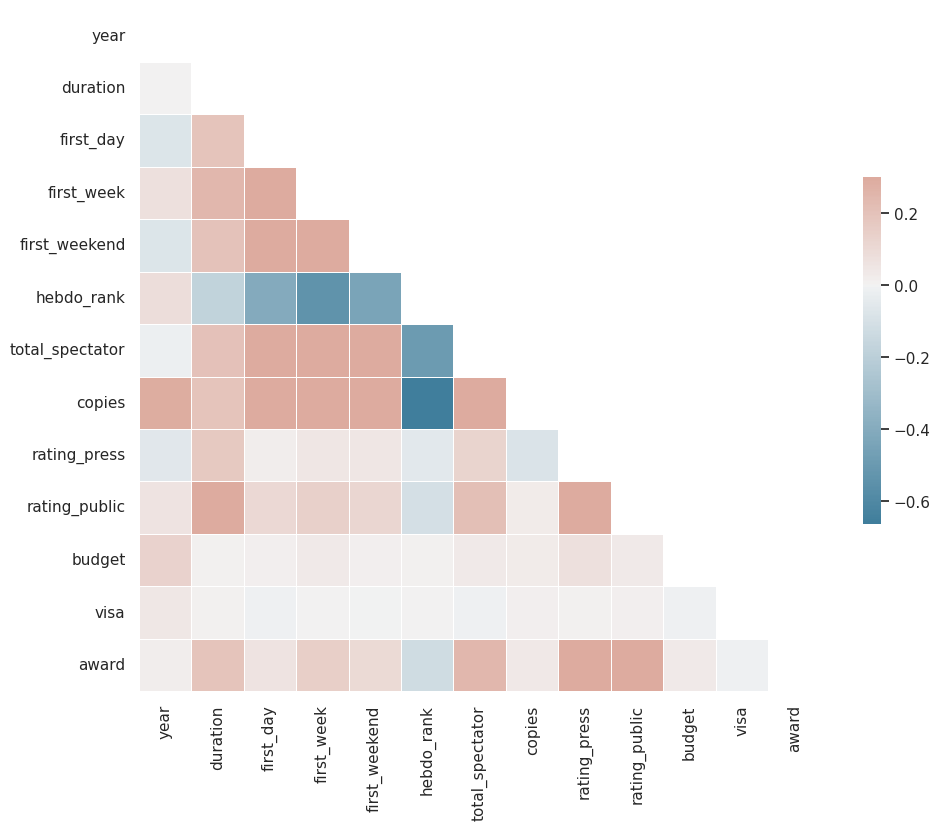

In [92]:
sns.set_theme(style='white')

# Calculer matrice de correlation 
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

# Configuration de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Affichage de couleur 
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Générer matrice de correlation
sns.heatmap(corr,mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths= .5, cbar_kws={"shrink": .5})

array([[<Axes: xlabel='year', ylabel='year'>,
        <Axes: xlabel='duration', ylabel='year'>,
        <Axes: xlabel='first_day', ylabel='year'>,
        <Axes: xlabel='first_week', ylabel='year'>,
        <Axes: xlabel='first_weekend', ylabel='year'>,
        <Axes: xlabel='hebdo_rank', ylabel='year'>,
        <Axes: xlabel='total_spectator', ylabel='year'>,
        <Axes: xlabel='copies', ylabel='year'>,
        <Axes: xlabel='rating_press', ylabel='year'>,
        <Axes: xlabel='rating_public', ylabel='year'>,
        <Axes: xlabel='budget', ylabel='year'>,
        <Axes: xlabel='visa', ylabel='year'>,
        <Axes: xlabel='award', ylabel='year'>],
       [<Axes: xlabel='year', ylabel='duration'>,
        <Axes: xlabel='duration', ylabel='duration'>,
        <Axes: xlabel='first_day', ylabel='duration'>,
        <Axes: xlabel='first_week', ylabel='duration'>,
        <Axes: xlabel='first_weekend', ylabel='duration'>,
        <Axes: xlabel='hebdo_rank', ylabel='duration'>,
        

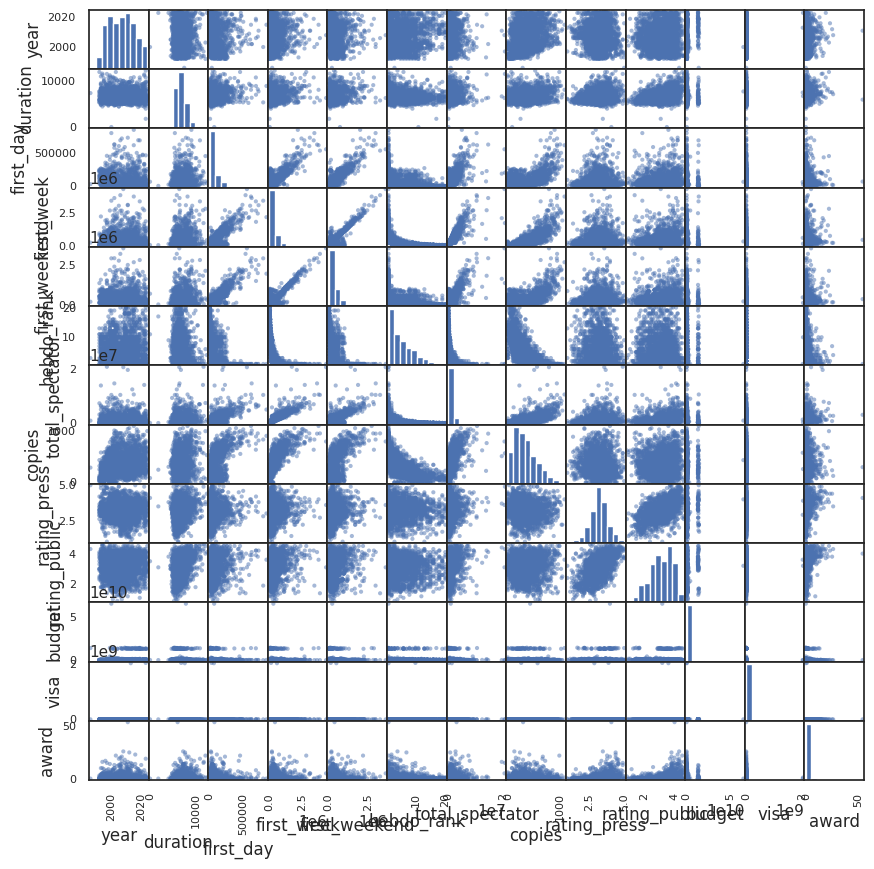

In [101]:
scatter_matrix(df, figsize=(10,10))

In [1]:
sns.set(style="ticks", color_codes=True)
df = sns.load_dataset('df')
sns.pairplot(df, hue= 'species')

NameError: name 'sns' is not defined